In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from econtools import read, outreg, table_statrow, write_notes
import econtools as econ
import econtools.metrics as mt
import math

<h3>The relathionship between inaccurate self-assessment and performance goals</h3>

In [2]:
df, meta = pyreadstat.read_sav("df.sav")

In [3]:
len(df)

2747

In [4]:


df_sat = pd.read_excel("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/수능(2005-2009학년도) DATA(Layout 포함)/수능 DATA(2008-2009학년도)_중학교 3학년생 코호트.xlsx")

In [5]:
# df_sat missing values = all nan/ seoncd score에는 nan이 많음 왜? 재수 안 한 사람들이 많으니깐

In [6]:
df_sat = df_sat[["AT08_32","AT08_33","AT08_34","AT09_32","AT09_33","AT09_34","BYSID"]]
df_sat["total_score_1"] = df_sat["AT08_32"] + df_sat["AT08_33"] + df_sat["AT08_34"]
df_sat["total_score_2"] = df_sat["AT09_32"] + df_sat["AT09_33"] + df_sat["AT09_34"]

In [7]:
# self assessment = ['F3S01129']
df_sat_temp = df_sat[['BYSID','total_score_1','total_score_2']]
df_temp = pd.merge(df, df_sat_temp)

In [8]:
df_temp

,BYSID,BYHID,GENDER,BYSCLASS,region,schooltype,F2S01004,F2S01005,F2S01006,F2S01007,...,F3H12025,F3H12026,F3H12027,F3H13001,F3H13002,F3H13003,F3H13004,income_rank_p,total_score_1,total_score_2
0,1003.0,10031.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547619,17.0,NaN
1,1003.0,10031.0,1.0,1.0,8.0,7.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,2.0,1.0,1.0,2.0,0.369748,17.0,NaN
2,1007.0,10071.0,1.0,1.0,2.0,7.0,2.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511905,19.0,NaN
3,1007.0,10071.0,1.0,1.0,2.0,7.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,3.0,1.0,2.0,3.0,0.613445,19.0,NaN
4,1008.0,10081.0,1.0,1.0,8.0,7.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452381,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,7921.0,79211.0,1.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,1.0,1.0,0.0,1.0,0.529412,27.0,NaN
1469,7924.0,79241.0,1.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,-5.0,-5.0,2.0,1.0,1.0,2.0,0.268908,14.0,NaN
1470,7926.0,79261.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,2.0,1.0,1.0,2.0,0.445378,NaN,NaN
1471,7927.0,79271.0,1.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,3.0,1.0,2.0,3.0,0.478992,23.0,NaN


In [9]:
# beliefs missing value
df_temp = df_temp[df_temp['F3S01129']>0]
df_temp = df_temp[df_temp['total_score_1']>0]
len(df_temp) #1231

1231

In [10]:
# gap between self-assessment and actual attainments
# total score average 
df_temp['total_score_1'] = df_temp['total_score_1']/3
#df_temp['total_score_2'] = df_temp['total_score_2']/3
df_temp['belief_gap'] = df_temp['F3S01129'] - df_temp['total_score_1']

In [11]:
# perfshare
df_temp['perf'] = df_temp['favorablejudg']+df_temp['negativejudg']
df_temp['perfshare'] = df_temp['perf'] / (df_temp['perf'] + df_temp['learning'])

#exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
#print(mt.reg(df, 'perfshare', exog))

In [12]:
len(df_temp[df_temp['belief_gap']<0]) # underestimate 913 out of 1346
len(df_temp[df_temp['belief_gap']>0]) # overestimate 259 out of 1346
len(df_temp[df_temp['belief_gap']==0]) # accurate 59 out of 1346

59

In [13]:
df_temp['belief_gap_abs'] = abs(df_temp['belief_gap'])

In [64]:
np.corrcoef(df_temp['belief_gap_abs'], df_temp['perfshare'])

array([[1.        , 0.00464427],
       [0.00464427, 1.        ]])

In [17]:
stat_b_gap = df_temp['belief_gap_abs'].describe().round(2)
stat_b_gap.to_latex('stat_b_gap.tex')

In [22]:
df_temp.loc[df_temp['belief_gap_abs'] == 8.0, 'F3S01129']

1424    1.0
Name: F3S01129, dtype: float64

In [67]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year','belief_gap_abs','total_score_1']
print(mt.reg(df_temp, 'perfshare', exog))

Dependent variable:	perfshare
N:			1231
R-squared:		0.0230
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                coeff    se      t   p>t CI_low CI_high
income_rank_p  -0.015 0.015 -0.978 0.328 -0.044   0.015
region         -0.000 0.001 -0.100 0.920 -0.001   0.001
schooltype      0.001 0.001  0.523 0.601 -0.001   0.003
GENDER         -0.006 0.006 -0.956 0.339 -0.017   0.006
year            0.000 0.000 43.770 0.000  0.000   0.000
belief_gap_abs -0.004 0.002 -1.517 0.130 -0.008   0.001
total_score_1   0.008 0.002  4.556 0.000  0.004   0.011



In [23]:
# 3rd round self-assessment ['F2S01109']
df_temp = df_temp[df_temp['F2S01109']>0]
df_temp['belief_gap2'] = df_temp['F2S01109'] - df_temp['total_score_1']
df_temp['belief_gap_abs2'] = abs(df_temp['belief_gap2'])
df_temp['F2S01109'].value_counts()
np.corrcoef(df_temp['belief_gap_abs2'], df_temp['perfshare'])

C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [78]:
df[df['F2S01109']>0] #412명

,BYSID,BYHID,GENDER,BYSCLASS,region,schooltype,F2S01004,F2S01005,F2S01006,F2S01007,...,F3H12026,F3H12027,F3H13001,F3H13002,F3H13003,F3H13004,income_rank_p,perf,pefshare,perfshare
0,1003.0,10031.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547619,6.0,0.666667,0.666667
1,1005.0,10051.0,1.0,1.0,15.0,5.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.380952,4.0,0.571429,0.571429
2,1007.0,10071.0,1.0,1.0,2.0,7.0,2.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.511905,6.0,0.666667,0.666667
3,1008.0,10081.0,1.0,1.0,8.0,7.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.452381,7.0,0.777778,0.777778
4,1010.0,10101.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,5.0,0.625000,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2980.0,29801.0,0.0,1.0,11.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,7.0,0.777778,0.777778
410,2981.0,29811.0,1.0,1.0,8.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.416667,7.0,0.700000,0.700000
411,2985.0,29851.0,0.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.321429,6.0,0.666667,0.666667
412,2986.0,29861.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.273810,7.0,0.700000,0.700000


<h2>Self-Assessment Real Proxy for Each Subjects</h2>

In [24]:
# 과목 잘한다 (1 전혀 그렇지 않다 - 5 매우 그렇다)
df_b = pd.merge(df, df_sat)

df_b = df_b[df_b['F3S01100']>0]
df_b = df_b[df_b['F3S01103']>0]
df_b = df_b[df_b['F3S01106']>0]

df_b = df_b.rename(columns = {'F3S01100': 'korean_b', 'F3S01103': 'math_b', 'F3S01106':'eng_b'})
df_b = df_b.rename(columns = {"AT08_32": 'korean_sat',"AT08_33": 'math_sat',"AT08_34": 'eng_sat'})

df_b = df_b[df_b['korean_sat']>0]
df_b = df_b[df_b['math_sat']>0]
df_b = df_b[df_b['eng_sat']>0]

In [25]:
beliefs = ['korean_b','math_b','eng_b']
sat = ['korean_sat', 'math_sat', 'eng_sat']

subjects = ['korean', 'math', 'eng']

for b in beliefs:
    df_b[b] = (5-df_b[b]) + 1

In [26]:
df_b['korean_b'].isna().value_counts()

False    1239
Name: korean_b, dtype: int64

In [27]:
subjects = ['korean', 'math', 'eng']

for s in subjects:
    df_b[s+'_b_gap'] = df_b[s+'_b'] - df_b[s+'_sat']
    #print(len(df_b[df_b[s+'_b_gap']<0])) # underestimate themselves
    
for s in subjects:
    df_b[s+'_b_gap_abs'] = abs(df_b[s+'_b_gap'])

In [32]:
b_gap = df_b[['korean_b_gap','math_b_gap', 'eng_b_gap']].describe().round(2)
b_gap.to_latex('b_gap_nonabs.tex')

In [28]:
df['total_b_gap_abs'] = (df_b['korean_b_gap_abs'] + df_b['math_b_gap_abs'] + df_b['eng_b_gap_abs'])/3

In [30]:
b_gaps = df['total_b_gap_abs'].describe().round(2)
b_gaps.to_latex('b_gaps.tex')

In [101]:
df_b['perf'] = df_b['favorablejudg']+df_b['negativejudg']
df_b['perfshare'] = df_b['perf'] / (df_b['perf'] + df_b['learning'])

for s in subjects:
    print(np.corrcoef(df_b[s+'_b_gap_abs'], df_b['perfshare']))

[[1.         0.09225555]
 [0.09225555 1.        ]]
[[1.         0.03512973]
 [0.03512973 1.        ]]
[[1.         0.07978247]
 [0.07978247 1.        ]]


In [106]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year','perfshare']
print(mt.reg(df_b, 'korean_b_gap_abs', exog))

Dependent variable:	korean_b_gap_abs
N:			1239
R-squared:		0.0970
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -1.742 0.230 -7.574 0.000 -2.193  -1.290
region        -0.009 0.010 -0.952 0.341 -0.028   0.010
schooltype    -0.076 0.015 -5.194 0.000 -0.105  -0.047
GENDER         0.551 0.091  6.057 0.000  0.373   0.729
year           0.001 0.000  7.154 0.000  0.001   0.002
perfshare      1.389 0.454  3.056 0.002  0.497   2.281



<h2> parents </h2>

In [4]:
df_HH1, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/1차년도(2004) DATA/중학교 3학년생 코호트/by_m_household.sav")

In [5]:

# 1 : parents 2: father, 3: mother 

In [6]:
#educational background of legal guradians'BYH26006', 'BYH27006'
df_HH1['BYH26006'].value_counts()
#df_HH1['BYH27006'].isna().value_counts()

 5.0    945
 7.0    413
 4.0    205
 6.0    113
-4.0    106
 3.0     86
 8.0     52
 9.0     18
 2.0      8
-3.0      5
Name: BYH26006, dtype: int64

In [7]:
df_HH1['BYH27006'].value_counts()

 5.0    1141
 4.0     309
 7.0     217
 3.0     105
 6.0      66
-4.0      55
 8.0      27
 2.0      18
 9.0       8
-3.0       5
Name: BYH27006, dtype: int64

In [8]:
df_HH1['parental_edu'] = df_HH1[['BYH26006','BYH27006']].max(axis = 1)

In [9]:
df_HH1 = df_HH1[df_HH1['parental_edu']>0]

<h2>baseline analysis including parental education</h2>

In [56]:
df = pd.merge(df, df_HH1)
df

,BYSID,BYHID,GENDER,BYSCLASS,region,schooltype,F2S01004,F2S01005,F2S01006,F2S01007,...,BYH27010C,BYH27011,BYH27012C,BYH27013,BYH27014,BYH28001,BYH28002,BYH28003,BYH28004,parental_edu
0,1003.0,10031.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,-5.0,-5.0,-5.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0
1,1003.0,10031.0,1.0,1.0,8.0,7.0,NaN,NaN,NaN,NaN,...,-5.0,-5.0,-5.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0
2,1005.0,10051.0,1.0,1.0,15.0,5.0,1.0,0.0,1.0,0.0,...,-5.0,-5.0,-5.0,1.0,2.0,3.0,1.0,2.0,3.0,4.0
3,1005.0,10051.0,1.0,1.0,15.0,5.0,NaN,NaN,NaN,NaN,...,-5.0,-5.0,-5.0,1.0,2.0,3.0,1.0,2.0,3.0,4.0
4,1007.0,10071.0,1.0,1.0,2.0,7.0,2.0,0.0,1.0,1.0,...,-5.0,-5.0,-5.0,1.0,2.0,3.0,1.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,2836.0,28361.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,-5.0,-5.0,1.0,2.0,3.0,2.0,1.0,1.0,5.0
1735,2837.0,28371.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,-5.0,-5.0,1.0,2.0,3.0,2.0,1.0,1.0,5.0
1736,2863.0,28631.0,1.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,-5.0,-5.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0
1737,2940.0,29401.0,0.0,1.0,8.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,2.0,11123101.0,1.0,2.0,2.0,0.0,2.0,2.0,7.0


In [65]:
df['perf'] = df['favorablejudg']+df['negativejudg']
df['perfshare'] = df['perf'] / (df['perf'] + df['learning'])
df['learningshare'] = df['learning'] / (df['learning']+df['perf']) 

In [58]:
#현재 성적 'F3S01129', 'F2S01109'
df['attainment'] = np.nan
df.loc[df['year'] == 2004, 'attainment'] = 9 - df['F3S01129'] + 1
df.loc[df['year'] == 2003, 'attainment'] = 9 - df['F2S01109'] + 1

In [59]:
# teacher effect
# F3S01066 , F3S01067, F3S01068, F3S01069 -> 1,2 서로 바꾸기 (높을수록 좋은 선생님 되게)
# F3S01070, F3S01071, F3S01072, F3S01073 -> 매우그렇다 (높을수록 좋은 선생님)

# F2S01049, F2S01050, F2S01051, F2S01052 -> 1,2 바꾸기
# F2S01053, F2S01054, F2S01055, F2S01056 -> 매우그렇다( 높을 수록 좋음 )

df['teacher_effect'] = np.nan
df.loc[df['year'] == 2003, 'teacher_effect'] = (df.loc[df['year'] == 2003,'F2S01053'] + df.loc[df['year'] == 2003, 'F2S01054'] + df.loc[df['year'] == 2003, 'F2S01055'] + df.loc[df['year'] == 2003, 'F2S01056'])/4
df.loc[df['year'] == 2004, 'teacher_effect'] =  (df.loc[df['year'] == 2004,'F3S01070']+ df.loc[df['year'] == 2004, 'F3S01071'] + df.loc[df['year'] == 2004, 'F3S01072'] + df.loc[df['year'] == 2004, 'F3S01073'])/4

In [60]:
# 대화시간 F2S02009 F3S02028
df['conv_mom'] = np.nan
df.loc[df['year'] == 2003, 'conv_mom'] = df.loc[df['year'] == 2003, 'F2S02009']
df.loc[df['year'] == 2004, 'conv_mom'] = df.loc[df['year'] == 2004, 'F3S02028']

# 남보다 F3S02031
df['pressure_mom'] = np.nan
df.loc[df['year'] == 2003, 'pressure_mom'] = 0
df.loc[df['year'] == 2004, 'pressure_mom'] = df.loc[df['year'] == 2004, 'F3S02031']

In [63]:
# 사교육비 'BYH22002'
df['private_edu'] = df['BYH22002'] 
df['private_edu'].isna().value_counts()

False    1739
Name: private_edu, dtype: int64

In [49]:
#goal list
goal_list = ['learning', 'betterperson', 'betterjob', 'futurework', 'forsociety', 'favorablejudg',  'popular',  'competition', 'forced', 'negativejudg',  'penalty']
other_goals = ['betterperson', 'betterjob', 'futurework', 'forsociety',  'popular',  'competition', 'forced',  'penalty','learning']

In [50]:
df_base = pd.merge(df, df_HH1)

In [73]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year', 'parental_edu', 'attainment', 'teacher_effect', 'pressure_mom'] + other_goals
print(mt.reg(df_base, 'perfshare', exog))

Dependent variable:	perfshare
N:			1739
R-squared:		0.2489
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                coeff    se      t   p>t CI_low CI_high
income_rank_p   0.018 0.012  1.532 0.126 -0.005   0.042
region          0.001 0.000  1.573 0.116 -0.000   0.002
schooltype     -0.001 0.001 -0.827 0.409 -0.002   0.001
GENDER          0.004 0.004  0.899 0.369 -0.004   0.012
year            0.000 0.000 29.078 0.000  0.000   0.000
parental_edu   -0.002 0.002 -1.248 0.212 -0.006   0.001
attainment     -0.007 0.001 -5.964 0.000 -0.010  -0.005
teacher_effect -0.009 0.003 -3.585 0.000 -0.014  -0.004
conv_mom        0.000 0.000  0.765 0.445 -0.000   0.000
pressure_mom   -0.002 0.001 -1.219 0.223 -0.004   0.001
betterperson   -0.016 0.003 -4.874 0.000 -0.023  -0.010
betterjob       0.022 0.003  6.376 0.000  0.015   0.029
futurework     -0.008 0.003 -2.558 0.011 -0.014  -0.002
forsociety      0.004 0.003  1.368 0.171 -0.002   0.009
popular         0.017 0.003  6.034 0.000  0.01

In [52]:
df_base['masteryshare'] = df_base['learning'] / (df_base['perf']+ df_base['learning'])

In [68]:
other_goals = ['betterperson', 'betterjob', 'futurework', 'forsociety',  'popular',  'competition', 'forced',  'penalty']
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year', 'parental_edu', 'attainment', 'teacher_effect', 'conv_mom', 'pressure_mom'] + other_goals
print(mt.reg(df_base, 'masteryshare', exog))

Dependent variable:	masteryshare
N:			1739
R-squared:		0.2489
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                coeff    se      t   p>t CI_low CI_high
income_rank_p  -0.018 0.012 -1.534 0.125 -0.042   0.005
region         -0.001 0.000 -1.575 0.115 -0.002   0.000
schooltype      0.001 0.001  0.793 0.428 -0.001   0.002
GENDER         -0.004 0.004 -0.896 0.370 -0.012   0.004
year            0.000 0.000 22.432 0.000  0.000   0.000
parental_edu    0.002 0.002  1.249 0.212 -0.001   0.006
attainment      0.007 0.001  5.962 0.000  0.005   0.010
teacher_effect  0.009 0.003  3.587 0.000  0.004   0.014
conv_mom       -0.000 0.000 -0.757 0.449 -0.000   0.000
pressure_mom    0.001 0.001  1.173 0.241 -0.001   0.004
betterperson    0.016 0.003  4.878 0.000  0.010   0.023
betterjob      -0.022 0.003 -6.377 0.000 -0.029  -0.015
futurework      0.008 0.003  2.556 0.011  0.002   0.014
forsociety     -0.004 0.003 -1.368 0.172 -0.009   0.002
popular        -0.017 0.003 -6.034 0.000 -0

<h2>Control</h2>

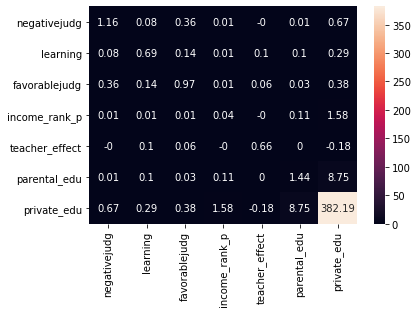

In [64]:
goal_array = np.array([df['negativejudg'],df['learning'],df['favorablejudg'],df['income_rank_p'],df['teacher_effect'], df['parental_edu'], df['private_edu']])

cov = np.cov(goal_array , bias = True).round(2)
goals = ['negativejudg','learning','favorablejudg','income_rank_p','teacher_effect', 'parental_edu', 'private_edu']

sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

<h2> Goal Scale </h2>

In [86]:
goal_list = ['learning', 'betterperson', 'betterjob', 'futurework', 'forsociety', 'favorablejudg',  'popular',  'competition', 'forced', 'negativejudg',  'penalty']

In [143]:
for i in goal_list:
    exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'parental_edu', 'attainment', 'teacher_effect', 'pressure_mom'] + goal_list
    exog.remove(i)
    print(mt.reg(df, i , exog, fe_name = 'year', addcons = True))
    a = mt.reg(df, i , exog)

Dependent variable:	learning
N:			1739
R-squared:		0.2214
Estimation method:	OLS
VCE method:		Standard (Homosk.)
Fixed effects by:	year
  No. of FE:		  2
                coeff    se      t   p>t CI_low CI_high
income_rank_p   0.010 0.105  0.097 0.923 -0.196   0.216
region          0.003 0.004  0.873 0.383 -0.004   0.011
schooltype      0.008 0.007  1.230 0.219 -0.005   0.021
GENDER         -0.217 0.037 -5.881 0.000 -0.289  -0.144
parental_edu    0.025 0.017  1.455 0.146 -0.009   0.058
attainment      0.079 0.011  7.418 0.000  0.058   0.099
teacher_effect  0.122 0.023  5.439 0.000  0.078   0.167
pressure_mom    0.015 0.013  1.170 0.242 -0.010   0.041
betterperson    0.270 0.029  9.359 0.000  0.214   0.327
betterjob      -0.135 0.030 -4.501 0.000 -0.194  -0.076
futurework      0.061 0.027  2.250 0.025  0.008   0.115
forsociety      0.063 0.023  2.710 0.007  0.017   0.109
favorablejudg   0.037 0.023  1.625 0.104 -0.008   0.081
popular         0.141 0.027  5.311 0.000  0.089   0.193
compet

Dependent variable:	popular
N:			1739
R-squared:		0.4186
Estimation method:	OLS
VCE method:		Standard (Homosk.)
Fixed effects by:	year
  No. of FE:		  2
                coeff    se      t   p>t CI_low CI_high
income_rank_p   0.052 0.094  0.554 0.580 -0.133   0.237
region         -0.004 0.004 -1.256 0.209 -0.011   0.002
schooltype      0.006 0.006  1.020 0.308 -0.006   0.018
GENDER          0.110 0.033  3.313 0.001  0.045   0.176
parental_edu   -0.012 0.015 -0.779 0.436 -0.042   0.018
attainment      0.018 0.010  1.878 0.061 -0.001   0.037
teacher_effect  0.041 0.020  2.029 0.043  0.001   0.081
pressure_mom    0.025 0.012  2.146 0.032  0.002   0.048
learning        0.114 0.022  5.311 0.000  0.072   0.156
betterperson   -0.073 0.027 -2.751 0.006 -0.125  -0.021
betterjob      -0.029 0.027 -1.063 0.288 -0.082   0.024
futurework     -0.057 0.025 -2.333 0.020 -0.106  -0.009
forsociety      0.033 0.021  1.575 0.116 -0.008   0.074
favorablejudg   0.266 0.019 13.830 0.000  0.228   0.304
competi

In [148]:
other_goals = ['betterperson', 'betterjob', 'futurework', 'forsociety',  'popular',  'competition', 'forced',  'penalty']
for i in ['learning', 'perf', 'perfshare']:
    exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'parental_edu', 'attainment', 'teacher_effect', 'pressure_mom'] + other_goals
    if i != 'learning':
        exog.append('learning')
    print(mt.reg(df, i , exog, fe_name = 'year', addcons = True))
    a = mt.reg(df, i , exog)

Dependent variable:	learning
N:			1739
R-squared:		0.2200
Estimation method:	OLS
VCE method:		Standard (Homosk.)
Fixed effects by:	year
  No. of FE:		  2
                coeff    se      t   p>t CI_low CI_high
income_rank_p   0.015 0.105  0.142 0.887 -0.191   0.220
region          0.003 0.004  0.866 0.387 -0.004   0.011
schooltype      0.007 0.007  1.073 0.283 -0.006   0.020
GENDER         -0.224 0.036 -6.155 0.000 -0.296  -0.153
parental_edu    0.025 0.017  1.492 0.136 -0.008   0.059
attainment      0.080 0.011  7.508 0.000  0.059   0.100
teacher_effect  0.124 0.022  5.521 0.000  0.080   0.168
pressure_mom    0.015 0.013  1.152 0.249 -0.011   0.041
betterperson    0.272 0.029  9.445 0.000  0.216   0.329
betterjob      -0.134 0.030 -4.485 0.000 -0.192  -0.075
futurework      0.059 0.027  2.168 0.030  0.006   0.113
forsociety      0.070 0.023  3.037 0.002  0.025   0.115
popular         0.152 0.025  6.173 0.000  0.104   0.201
competition    -0.006 0.019 -0.342 0.733 -0.044   0.031
forced

In [199]:
j = 1
reg_result = []
for i in goal_list:
    exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'parental_edu', 'attainment', 'teacher_effect', 'pressure_mom']
    print(mt.reg(df, i , exog, fe_name = 'year', addcons = True))
    globals()['reg_{}'.format(j)] = mt.reg(df, i , exog, fe_name = 'year', addcons = True)
    reg_result.append(globals()['reg_{}'.format(j)])
    j = j + 1

regs = tuple(reg_result)
exog_tab = ['income_rank_p', 'parental_edu', 'attainment', 'teacher_effect', 'pressure_mom', '_cons']
# Put coefficients and standard errors in a table
table_string = outreg(regs,
                      exog_tab,     # Add these coefficients to the table
                      ['Parental Income',                 # Use these label for the coeffs
                       'Parents Education' ,
                       'Academic Ability',
                       'Teacher Effect',
                       'Parents Effect','Constant'],
                      digits=3)                           # Round to 3 decimal digits.-

# Add R^2 to the table
table_string += "\\\\ \n"                           # Empty line between betas and r2
table_string += table_statrow("R$^2$",               # Add a row with this label
                              [x.r2 for x in regs], digits=3) # Fill the row with these values
                              

# Save the table string to a file
results_path = 'mental_reg_tab.tex'
with open(results_path,'w') as f:
    f.write(table_string)

# Save separate file with table notes
#notes = "Sample size is {}.".format(reg1.N)
#write_notes(notes, results_path)

Dependent variable:	learning
N:			1739
R-squared:		0.1231
Estimation method:	OLS
VCE method:		Standard (Homosk.)
Fixed effects by:	year
  No. of FE:		  2
                coeff    se      t   p>t CI_low CI_high
income_rank_p   0.064 0.111  0.582 0.561 -0.153   0.281
region          0.004 0.004  1.004 0.315 -0.004   0.012
schooltype      0.008 0.007  1.194 0.233 -0.005   0.022
GENDER         -0.275 0.038 -7.234 0.000 -0.349  -0.200
parental_edu    0.035 0.018  1.973 0.049  0.000   0.071
attainment      0.106 0.011  9.788 0.000  0.085   0.128
teacher_effect  0.169 0.023  7.232 0.000  0.123   0.215
pressure_mom    0.037 0.014  2.713 0.007  0.010   0.063

Dependent variable:	betterperson
N:			1739
R-squared:		0.0701
Estimation method:	OLS
VCE method:		Standard (Homosk.)
Fixed effects by:	year
  No. of FE:		  2
                coeff    se      t   p>t CI_low CI_high
income_rank_p   0.151 0.109  1.377 0.169 -0.064   0.365
region          0.003 0.004  0.690 0.491 -0.005   0.011
schooltype     

Dependent variable:	penalty
N:			1739
R-squared:		0.0375
Estimation method:	OLS
VCE method:		Standard (Homosk.)
Fixed effects by:	year
  No. of FE:		  2
                coeff    se      t   p>t CI_low CI_high
income_rank_p  -0.190 0.120 -1.589 0.112 -0.425   0.045
region          0.006 0.004  1.244 0.214 -0.003   0.014
schooltype     -0.023 0.008 -3.064 0.002 -0.038  -0.008
GENDER          0.115 0.041  2.803 0.005  0.035   0.196
parental_edu    0.007 0.019  0.336 0.737 -0.032   0.045
attainment     -0.032 0.012 -2.728 0.006 -0.055  -0.009
teacher_effect -0.013 0.025 -0.518 0.604 -0.063   0.037
pressure_mom    0.051 0.015  3.498 0.000  0.022   0.080



In [153]:
df['income_rank_log'] = np.log(df['income_rank_p'])

In [157]:
df['mental_log'] = np.log(df['mental_resource'])

In [175]:
df['mental_resource'].describe()

count    1739.000000
mean        3.280930
std         0.517882
min         1.099000
25%         2.998000
50%         3.298000
75%         3.597000
max         4.896000
Name: mental_resource, dtype: float64

In [176]:
df['mental_norm'] = (df['mental_resource']-df['mental_resource'].mean())/0.517882

In [170]:
df['perflearn'] = df['perf']+df['learning']
df['perflearn'] = np.log(df['perflearn'])
df['perfshare_log'] = np.log(df['perfshare'])

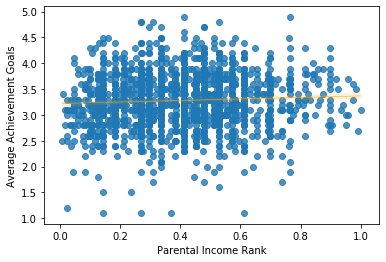

In [246]:
ax = sns.regplot(x="income_rank_p", y="mental_resource", data=df, line_kws={"color": "orange", 'linewidth': 0.5})
ax.set(xlabel='Parental Income Rank', ylabel='Average Achievement Goals')
plt.show()
fig = ax.get_figure()
fig.savefig('mental_income_r_plot.png')

In [136]:
(0.1+0.025+0.019+0.107+ (-0.074)+(0.178)+(0.052)+(-0.17)+(-0.122)+(0.142)+(-0.126))/11

0.011909090909090904

In [125]:
for i in goal_list:
    exog = ['income_rank_p']
    print(mt.reg(df, i , exog))

Dependent variable:	learning
N:			1739
R-squared:		-2.0505
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
income_rank_p 5.797 0.078 74.583 0.000  5.644   5.949

Dependent variable:	betterperson
N:			1739
R-squared:		-3.9812
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
income_rank_p 7.671 0.095 80.410 0.000  7.484   7.858

Dependent variable:	betterjob
N:			1739
R-squared:		-4.9595
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
income_rank_p 8.179 0.102 80.458 0.000  7.980   8.379

Dependent variable:	futurework
N:			1739
R-squared:		-4.5089
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
income_rank_p 8.285 0.102 81.493 0.000  8.086   8.484

Dependent variable:	forsociety
N:			1739
R-squared:		-2.8261
Estimation method:	OLS
VCE method:		Stan

In [88]:
print(goal_list)

['learning', 'betterperson', 'betterjob', 'futurework', 'forsociety', 'favorablejudg', 'popular', 'competition', 'forced', 'negativejudg', 'penalty']


In [97]:
df['mental_resource'] = 0
for i in goal_list:
    df['mental_resource'] = df['mental_resource']+df[i]
df['mental_resource'] = df['mental_resource']/len(goal_list)
df['mental_resource'] = df['mental_resource'].round(3)

In [99]:
df['mental_resource'].describe().round(3)

count    1739.000
mean        3.281
std         0.518
min         1.099
25%         2.998
50%         3.298
75%         3.597
max         4.896
Name: mental_resource, dtype: float64

lb:  2.099500000000001
ub:  4.4955


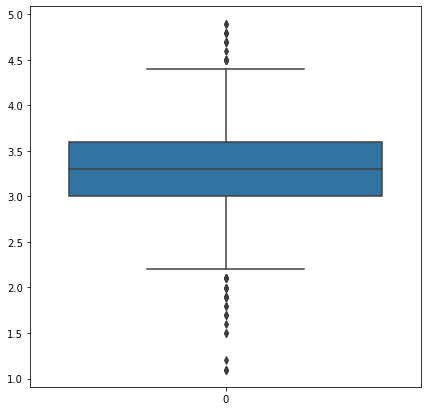

In [106]:
plt.figure(figsize=(7,7))
sns.boxplot(data = df['mental_resource'])
plt.show

def outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr *1.5)
    print('lb: ', lower_bound)
    upper_bound = q3 + (iqr * 1.5)
    print('ub: ', upper_bound)

    return np.where((data > upper_bound)|(data < lower_bound))

mental_out = outliers(df['mental_resource'])

In [121]:
df.loc[df['mental_resource'] > 4.5, 'income'].mean()

316.3636363636364

In [115]:
print('top 50', df.loc[df['mental_resource'] > 3.298, 'income_rank_p'].mean())
print('bottom 50', df.loc[df['mental_resource'] < 3.298, 'income_rank_p'].mean())

top 50 0.41504413085989106
bottom 50 0.3930317806134795


In [202]:
print('top 25%', df.loc[df['mental_resource'] > 3.597, 'income_rank_p'].mean())
print('bottom 25%', df.loc[df['mental_resource'] < 2.998, 'income_rank_p'].mean())
print('top 25%', df.loc[df['mental_resource'] > 3.597, 'income'].mean())
print('bottom 25%', df.loc[df['mental_resource'] < 2.998, 'income'].mean())

top 25% 0.41627573359440767
bottom 25% 0.3912602424147224
top 25% 325.99514563106794
bottom 25% 308.0397196261682


C:\Users\thxkn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\thxkn\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


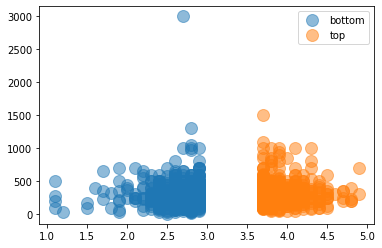

In [210]:
df_mental = df[(df['mental_resource']>3.597) | (df['mental_resource']<2.998)]
df_mental['label'] = 'bottom'
df_mental.loc[df_mental['mental_resource']>3.597, 'label'] = 'top'

x = df_mental['income']
groups = df_mental.groupby('label')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot( group['mental_resource'], group['income'], marker='o', alpha = 0.5, linestyle = '', ms=12, label=name)
ax.legend()

plt.show()

In [120]:
print('income top 10% ', df.loc[df['income_rank_p'] > 0.9, 'mental_resource'].mean())
print('income bottom 10% ', df.loc[df['income_rank_p'] <= 0.1, 'mental_resource'].mean())

income top 10%  3.2119285714285715
income bottom 10%  3.0470597014925382


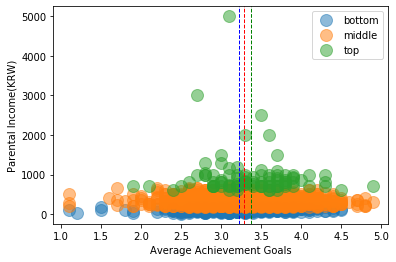

In [239]:
df['label'] = 'bottom'
df.loc[df['income_rank_p']>0.25, 'label'] = 'middle'
df.loc[df['income_rank_p']>0.75, 'label'] = 'top'

groups = df.groupby('label')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot( group['mental_resource'], group['income'], marker='o', alpha = 0.5, linestyle = '', ms=12, label=name)

ax.axvline(df.loc[df['label'] == 'bottom','mental_resource'].mean(), color = 'b', linestyle = '--', linewidth = 1)
ax.axvline(df.loc[df['label'] == 'middle','mental_resource'].mean(), color = 'r', linestyle = '--', linewidth = 1)
ax.axvline(df.loc[df['label'] == 'top','mental_resource'].mean(), color = 'g', linestyle = '--', linewidth = 1)
ax.legend()
plt.xlabel('Average Achievement Goals')
plt.ylabel('Parental Income(KRW)')
plt.show()

fig = ax.get_figure()
fig.savefig('mental_income_plot.png')

In [111]:
df.loc[df['mental_resource']<2.1, 'income_rank_p'].mean()

0.38466386554621845

In [ ]:
goal_array = np.array([df['negativejudg'],df['learning'],df['favorablejudg'],df['income_rank_p'],df['teacher_effect'], df['parental_edu'], df['private_edu']])

cov = np.cov(goal_array , bias = True).round(2)
goals = ['negativejudg','learning','favorablejudg','income_rank_p','teacher_effect', 'parental_edu', 'private_edu']

sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

In [101]:
np.corrcoef(df['mental_resource'],df['income_rank_p'])

array([[1.        , 0.05582566],
       [0.05582566, 1.        ]])

In [121]:
df_b_p = pd.merge(df_b, df_HH1)

In [140]:
len(df_b_p)

875

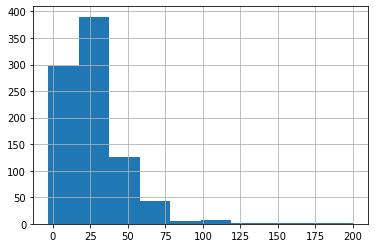

In [127]:
# 사교육비 BYH22002
df_b_p['BYH22002'].hist()

In [122]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year','perfshare', 'parental_edu']
print(mt.reg(df_b_p, 'korean_b_gap_abs', exog))

Dependent variable:	korean_b_gap_abs
N:			875
R-squared:		0.1040
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.795 0.299 -2.662 0.008 -1.382  -0.209
region        -0.017 0.011 -1.527 0.127 -0.039   0.005
schooltype    -0.166 0.025 -6.693 0.000 -0.214  -0.117
GENDER         0.357 0.104  3.434 0.001  0.153   0.561
year           0.002 0.000  8.324 0.000  0.001   0.002
perfshare      1.084 0.531  2.040 0.042  0.041   2.126
parental_edu  -0.165 0.047 -3.484 0.001 -0.258  -0.072



In [130]:
exog = [ 'region', 'schooltype', 'GENDER', 'year','perfshare', 'parental_edu']
print(mt.reg(df_b_p, 'math_b_gap_abs', exog))

Dependent variable:	math_b_gap_abs
N:			875
R-squared:		0.0722
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
region        0.007 0.010  0.699 0.485 -0.013   0.028
schooltype   -0.168 0.023 -7.321 0.000 -0.213  -0.123
GENDER        0.285 0.096  2.954 0.003  0.096   0.474
year          0.001 0.000  6.871 0.000  0.001   0.002
perfshare     0.272 0.492  0.553 0.580 -0.694   1.239
parental_edu -0.054 0.041 -1.322 0.187 -0.134   0.026



In [133]:
exog = [ 'region', 'schooltype', 'GENDER', 'year','perfshare', 'parental_edu']
print(mt.reg(df_b_p, 'eng_b_gap_abs', exog))

Dependent variable:	eng_b_gap_abs
N:			875
R-squared:		0.1107
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
region       -0.002 0.011 -0.153 0.878 -0.022   0.019
schooltype   -0.173 0.023 -7.464 0.000 -0.219  -0.128
GENDER        0.300 0.098  3.076 0.002  0.109   0.492
year          0.002 0.000  8.628 0.000  0.001   0.002
perfshare     0.993 0.499  1.990 0.047  0.013   1.972
parental_edu -0.230 0.041 -5.577 0.000 -0.311  -0.149



In [134]:
#df.to_excel('df.xlsx')
#df_b.to_excel('df_b.xlsx')
#df_b_p.to_excel('df_b_p.xlsx')

<h1> Future Earnings </h1>

In [138]:
# 학생 earning (2015) "F11Y05034"

df_youth, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/12차년도(2015) DATA/중학교 3학년 코호트/f11_m_youth.sav")

In [139]:
df_youth = df_youth.rename(columns = {"F11Y05034": "income_st"})

In [141]:
df_bpi = pd.merge(df_b_p, df_youth)
len(df_bpi)

367

In [143]:
df_bpi = df_bpi[df_bpi['income_st']>0]

In [150]:
exog = ['perfshare','region', 'schooltype', 'GENDER', 'year', 'income_rank_p']
print(mt.reg(df_bpi, 'income_st', exog))

Dependent variable:	income_st
N:			151
R-squared:		-25576607501071228156998844416.0000
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                               coeff                   se      t   p>t                 CI_low               CI_high
perfshare     -18378910317440960.000 6771164114290793.000 -2.714 0.007 -31761842381209968.000 -4995978253671952.000
region            51671655682492.500  219557261603262.594  0.235 0.814   -382274393556247.688   485617704921232.688
schooltype        49355022230891.000  404831734655218.438  0.122 0.903   -750778530981031.125   849488575442813.125
GENDER         -9007199254740992.000                  nan    nan   nan                    nan                   nan
year               4398046511104.000                  nan    nan   nan                    nan                   nan
income_rank_p                  0.000 3670717716707227.500  0.000 1.000  -7255025132869849.000  7255025132869849.000



C:\Users\thxkn\anaconda3\lib\site-packages\econtools\metrics\core.py:203: RuntimeWarning: invalid value encountered in sqrt
  se = pd.Series(np.sqrt(np.diagonal(vce)), index=vce.columns)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
